#  Project on “customer_churn” Dataset

In [1]:
#importing all the required libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score,r2_score

In [2]:
# Loading the 'customer_churn dataset'

dataset = pd.read_csv("E:\Intellipaat\Data Science with R\Data Science with R Part-I/customer_churn.csv")

In [3]:
# View dataset

dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
dataset.shape

(7043, 21)

In [5]:
dataset.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

# Tasks:

# A)	Data Manipulation:

In [7]:
# a.) Extract the 5th column & store it in ‘customer_5’

customer_5 = pd.DataFrame(dataset.iloc[:,4])
customer_5.head()

,Dependents
0,No
1,No
2,No
3,No
4,No


In [8]:
#b.)Extract the 15th column & store it in ‘customer_15’

customer_15 = pd.DataFrame(dataset.iloc[:,14])
customer_15.head()

,StreamingMovies
0,No
1,No
2,No
3,No
4,No


In [9]:
#c.Extract all the male senior citizens whose Payment Method is Electronic check & store the result in ‘senior_male_electronic’

senior_male_electronic = dataset[(dataset['gender'] == 'Male')
                                & (dataset['SeniorCitizen'] == 1)
                                & (dataset['PaymentMethod'] == 'Electronic check')]
senior_male_electronic.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.7,No


In [10]:
#d.) Extract all those customers whose tenure is greater than 70 months or their Monthly charges is more than 100$ 
# & store the result in ‘customer_total_tenure’

customer_total_tenure = dataset[(dataset['tenure']>70) | (dataset['MonthlyCharges']> 100)]
customer_total_tenure.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No


In [11]:
#e.) Extract all the customers whose Contract is of two years, payment method is Mailed check 
# & the value of Churn is ‘Yes’ & store the result in ‘two_mail_yes’

two_mail_yes = dataset[(dataset['Contract'] == 'Two year') 
                        & (dataset['PaymentMethod'] == 'Mailed check') 
                        & (dataset['Churn'] == 'Yes')]
two_mail_yes.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.3,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


In [12]:
# f.Extract 333 random records from the customer_churn dataframe& store the result in ‘customer_333’

customer_333 = dataset.sample(n=333)
customer_333.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3215,3481-JHUZH,Male,0,Yes,No,41,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,80.25,3439,No
3653,8106-GWQOK,Male,0,Yes,No,38,No,No phone service,DSL,Yes,...,No,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),60.00,2193.2,No
2341,4304-TSPVK,Female,0,Yes,No,68,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),114.90,7843.55,No
4017,9473-CBZOP,Female,0,No,No,28,Yes,Yes,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,59.00,1654.45,No
6290,2530-ENDWQ,Female,0,Yes,No,71,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),93.70,6585.35,Yes


In [13]:
# g.) Get the count of different levels from the ‘Churn’ column

dataset['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

# B)	Data Visualization:

Text(0.5,1,'Distribution of Internet Service')

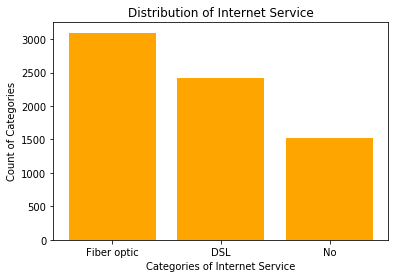

In [14]:
# a.) Build a bar-plot for the ’InternetService’ column:
# i.) Set x-axis label to ‘Categories of Internet Service’
# ii.) Set y-axis label to ‘Count of Categories’
# iii.) Set the title of plot to be ‘Distribution of Internet Service’
# iv.) Set the color of the bars to be ‘orange’

x = dataset['InternetService'].value_counts().keys().tolist()
y = dataset['InternetService'].value_counts().tolist()

plt.bar(x,y,color='orange')
plt.xlabel("Categories of Internet Service")
plt.ylabel("Count of Categories")
plt.title("Distribution of Internet Service")

Text(0.5,1,'Distribution of tenure')

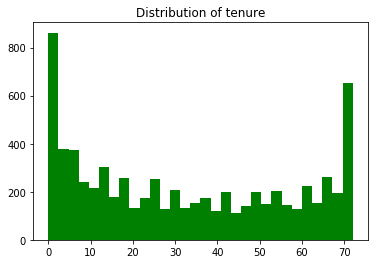

In [15]:
#b.) Build a histogram for the ‘tenure’ column:
# i.Set the number of bins to be 30
# ii.Set the color of the bins  to be ‘green’
# iii.Assign the title ‘Distribution of tenure’

plt.hist(dataset['tenure'], color='green', bins=30)
plt.title("Distribution of tenure")

Text(0.5,1,'Tenure vs Monthly Charges')

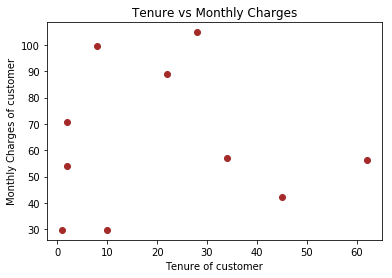

In [16]:
#c.Build a scatter-plot between ‘MonthlyCharges’ & ‘tenure’. Map ‘MonthlyCharges’ to the y-axis & ‘tenure’ to the ‘x-axis’:
# i.Assign the points a color of ‘brown’
# ii.Set the x-axis label to ‘Tenure of customer’
# iii.Set the y-axis label to ‘Monthly Charges of customer’
# iv.Set the title to ‘Tenure vs Monthly Charges’

x = dataset['tenure'].head(10)
y = dataset['MonthlyCharges'].head(10)

plt.scatter(x,y, color = 'brown')
plt.xlabel("Tenure of customer") 
plt.ylabel("Monthly Charges of customer") 
plt.title("Tenure vs Monthly Charges")

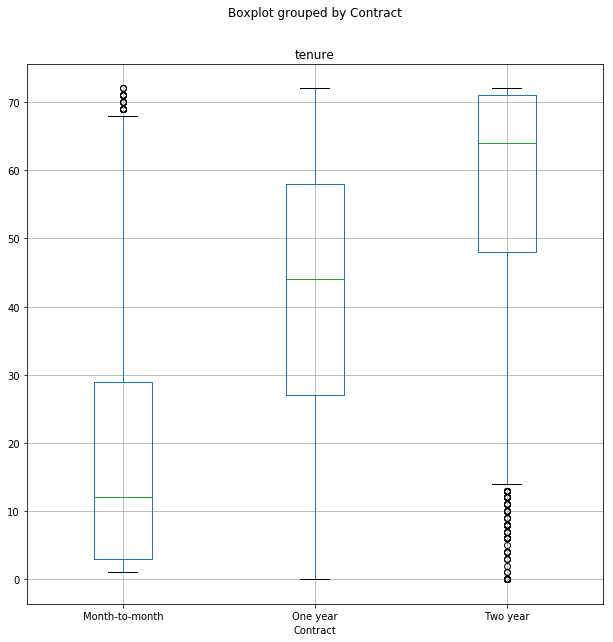

In [17]:
# d.) Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the y-axis & ‘Contract’ on the x-axis. 

dataset.boxplot(column = 'tenure', by = 'Contract', figsize=(10,10))

# C)	Linear Regression:

In [18]:
# a.) Build a simple linear model where dependent variable is ‘MonthlyCharges’ and independent variable is ‘tenure’
  # i.   Divide the dataset into train and test sets in 70:30 ratio. 
  # ii.  Build the model on train set and predict the values on test set
  # iii. After predicting the values, find the root mean square error
  # iv.  Find out the error in prediction & store the result in ‘error’
  # v.   Find the root mean square error


In [19]:
x = pd.DataFrame(dataset['tenure'])
y = pd.DataFrame(dataset['MonthlyCharges'])

In [20]:
x.head()

,tenure
0,1
1,34
2,2
3,45
4,2


In [21]:
y.head()

,MonthlyCharges
0,29.85
1,56.95
2,53.85
3,42.30
4,70.70


In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.30, random_state = 1)

In [23]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4930, 1)
(2113, 1)
(4930, 1)
(2113, 1)


In [24]:
model_1 = LinearRegression()
model_1.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
y_pred_model_1 = model_1.predict(x_test)

In [26]:
y_pred_model_1=pd.DataFrame(y_pred_model_1,columns=['Predicted Values'])
y_pred_model_1.head()

,Predicted Values
0,67.515328
1,75.267438
2,58.522880
3,56.352289
4,57.902711


In [27]:
print("MAE: ",metrics.mean_absolute_error(y_test,y_pred_model_1))

('MAE: ', 25.237101628974784)


In [28]:
error = metrics.mean_squared_error(y_test,y_pred_model_1)
print ("Mean Square Error: ",error)

('Mean Square Error: ', 850.043757180835)


In [29]:
print ('Root Mean Square Error: ', np.sqrt(metrics.mean_squared_error(y_test,y_pred_model_1)))

('Root Mean Square Error: ', 29.15550989402921)


# D)	Logistic Regression:

In [30]:
# a.) Build a simple logistic regression modelwhere dependent variable is ‘Churn’ & independent variable is ‘MonthlyCharges’
#    i.   Divide the dataset in 65:35 ratio
#    ii.  Build the model on train set and predict the values on test set
#    iii. Build the confusion matrix and get the accuracy score


In [31]:
x = pd.DataFrame(dataset['MonthlyCharges'])
y = pd.DataFrame(dataset['Churn'])

In [32]:
x.head()

,MonthlyCharges
0,29.85
1,56.95
2,53.85
3,42.30
4,70.70


In [33]:
y.head()

,Churn
0,No
1,No
2,Yes
3,No
4,Yes


In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.35, random_state = 1)

In [35]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4577, 1)
(2466, 1)
(4577, 1)
(2466, 1)


In [36]:
model_2 = LogisticRegression()
model_2.fit(x_train,y_train)

E:\ProgramFiles\Python\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\ProgramFiles\Python\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [37]:
y_pred_model_2 = model_2.predict(x_test)

In [38]:
y_pred_model_2 = pd.DataFrame(y_pred_model_2, columns= ['Predicted Values'])
y_pred_model_2.head()

,Predicted Values
0,No
1,No
2,No
3,No
4,No


In [39]:
conf_mat = confusion_matrix(y_test,y_pred_model_2)
print(" Confusion Matrix: ")
conf_mat

 Confusion Matrix: 


array([[1840,    0],
       [ 626,    0]], dtype=int64)

In [40]:
Accuracy = accuracy_score(y_test,y_pred_model_2)
print(" Accuracy: " )
Accuracy

 Accuracy: 


0.7461476074614761

In [41]:
# b.) Build a multiple logistic regression model where dependent variable is ‘Churn’ & independent variables are ‘tenure’ & ‘MonthlyCharges’
#   i.    Divide the dataset in 80:20 ratio
#   ii.   Build the model on train set and predict the values on test set
#   iii.  Build the confusion matrix and get the accuracy score


In [42]:
x = pd.DataFrame(dataset.loc[:,['tenure', 'MonthlyCharges']])
y = pd.DataFrame(dataset['Churn'])

In [43]:
x.head()

,tenure,MonthlyCharges
0,1,29.85
1,34,56.95
2,2,53.85
3,45,42.30
4,2,70.70


In [44]:
y.head()

,Churn
0,No
1,No
2,Yes
3,No
4,Yes


In [45]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 20, random_state = 1)

In [46]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7023, 2)
(20, 2)
(7023, 1)
(20, 1)


In [47]:
model_3 = LogisticRegression()
model_3.fit(x_train,y_train)

E:\ProgramFiles\Python\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [48]:
y_pred_model_3 = model_3.predict(x_test)

In [49]:
y_pred_model_3 = pd.DataFrame(y_pred_model_3, columns=['Predicted Values'])
y_pred_model_3.head()

,Predicted Values
0,No
1,No
2,No
3,No
4,No


In [50]:
conf_mat_MLog = confusion_matrix(y_test,y_pred_model_3)
print(" Confusion Matrix: ")
conf_mat_MLog

 Confusion Matrix: 


array([[18,  0],
       [ 1,  1]], dtype=int64)

In [51]:
Accuracy_MLog = accuracy_score(y_test,y_pred_model_3)
print(" Accuracy: " )
Accuracy_MLog

 Accuracy: 


0.95

# E)	Decision Tree:

In [52]:
# a.) Build a decision tree model where dependent variable is ‘Churn’ & independent variable is ‘tenure’
#   i.    Divide the dataset in 80:20 ratio
#   ii.   Build the model on train set and predict the values on test set
#   iii.  Build the confusion matrix and calculate the accuracy


In [53]:
x = pd.DataFrame(dataset['tenure'])
y = pd.DataFrame(dataset['Churn'])

In [54]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.20, random_state = 1)

In [55]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5634, 1)
(1409, 1)
(5634, 1)
(1409, 1)


In [56]:
model_4 = DecisionTreeClassifier()
model_4.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [57]:
y_pred_model_4 = model_4.predict(x_test)

In [58]:
y_pred_model_4 = pd.DataFrame(y_pred_model_4, columns=['Predicted Values'])
y_pred_model_4.head()

,Predicted Values
0,No
1,No
2,No
3,No
4,No


In [59]:
conf_mat_DT = confusion_matrix(y_test,y_pred_model_4)
print(" Confusion Matrix: ")
conf_mat_DT

 Confusion Matrix: 


array([[983,  78],
       [254,  94]], dtype=int64)

In [60]:
Accuracy_DT = accuracy_score(y_test,y_pred_model_4)
print(" Accuracy: " )
Accuracy_DT

 Accuracy: 


0.7643718949609652

# F)	Random Forest:

In [61]:
# a.) Build a Random Forest model where dependent variable is ‘Churn’ & independent variables are ‘tenure’ and ‘MonthlyCharges’
#    i.    Divide the dataset in 70:30 ratio
#    ii.   Build the model on train set and predict the values on test set
#    iii.  Build the confusion matrix and calculate the accuracy


In [62]:
x = pd.DataFrame(dataset.loc[:,['tenure','MonthlyCharges']])
y = pd.DataFrame(dataset['Churn'])

In [63]:
x.head()

,tenure,MonthlyCharges
0,1,29.85
1,34,56.95
2,2,53.85
3,45,42.30
4,2,70.70


In [64]:
y.head()

,Churn
0,No
1,No
2,Yes
3,No
4,Yes


In [65]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.30, random_state = 1)

In [66]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4930, 2)
(2113, 2)
(4930, 1)
(2113, 1)


In [67]:
model_5 = RandomForestClassifier()
model_5.fit(x_train,y_train)

E:\ProgramFiles\Python\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\ProgramFiles\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [68]:
y_pred_model_5 = model_5.predict(x_test)

In [69]:
y_pred_model_5 = pd.DataFrame(y_pred_model_5, columns=['Predicted Values'])
y_pred_model_5.head()

,Predicted Values
0,No
1,Yes
2,No
3,No
4,No


In [70]:
conf_mat_RT = confusion_matrix(y_test,y_pred_model_5)
print(" Confusion Matrix: ")
conf_mat_RT

 Confusion Matrix: 


array([[1371,  214],
       [ 295,  233]], dtype=int64)

In [71]:
Accuracy_RT = accuracy_score(y_test,y_pred_model_5)
print(" Accuracy: " )
Accuracy_RT

 Accuracy: 


0.759110269758637